In [11]:
# #Importing sklearn modules
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.datasets import load_diabetes


ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

dataset = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
dataset.isnull().sum()

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [14]:
import sklearn

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataset = pd.read_csv(url, names=names)

In [4]:
# Checking the data set for any NULL values is very essential, as MLAs can not 
# handle NULL values. We have to either eliminate the records with NULL values 
# or replace them with the mean/median of the other values. we can see each of 
# the variables are printed with number of null values. This data set has no null 
# values so all are zero here.

# In[]:
# Creating variables for analysis
# As we can see that the data frame contains nine variables in nine columns. 
# The first eight columns contain the independent variables. These are some 
# physiological variables having a correlation with diabetes symptoms. The ninth 
# column shows if the patient is diabetic or not. So, here the x stores the 
# independent variables and y stores the dependent variable diabetes count.
x=dataset.iloc[:,: -1]
y=dataset.iloc[:,-1]

In [5]:
# In[]:
# Splitting train and split data
# The test data set size is 20% of the total records. This test data will not 
# be used in model training and work as an independent test data.
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [6]:
# In[]:
# Application of all Machine Learning methods
# Some very popular MLAs we have selected here for comparison and stored in a 
# variable; so that they can be used at later part of the process. The MLAs 
# first we have taken up for comparison are Logistic Regression, Linear 
# Discriminant Analysis, K-nearest neighbour classifier, Decision tree classifier, 
# Naive-Bayes classifier and Support Vector Machine.
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [7]:
# In[]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

In [8]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None, shuffle=False)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.757245 (0.050319)
LDA: 0.754019 (0.046260)


C:\Users\Ictinike\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Ictinike\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

KNN: 0.700291 (0.042088)
CART: 0.667821 (0.054994)
NB: 0.737811 (0.044982)
SVM: 0.744368 (0.038490)


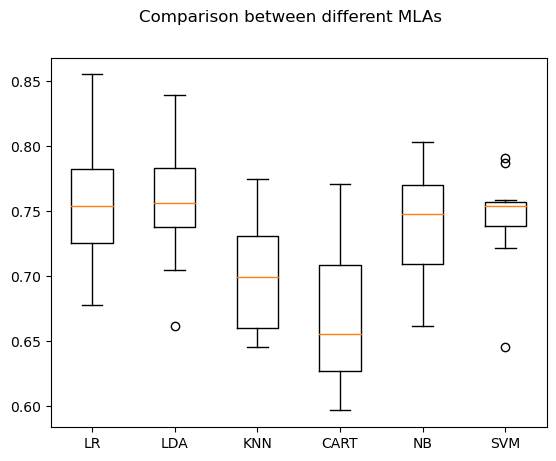

In [9]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()    

In [43]:
# In[]:
# Application of all Machine Learning methods
MLA = [
    #GLM
    linear_model.LogisticRegressionCV(max_iter=2000),
    linear_model.PassiveAggressiveClassifier(max_iter=2000),
    linear_model.SGDClassifier(max_iter=2000),
    linear_model.Perceptron(max_iter=2000),
    
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    #svm.LinearSVC(max_iter=2000),
    
    #Trees    
    tree.DecisionTreeClassifier(),
  
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #Others
    neural_network.MLPClassifier(hidden_layer_sizes = (512, 256, 128, 64), max_iter=10000),
    #neural_network.MLPRegressor(max_iter=2000),
    ]

In [44]:
# In[]:
    #Generating a dataframe to visualize comparison betweeen all algorithms
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

In [45]:
row_index = 0
for alg in MLA:  
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    MLA_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)

    row_index+=1

C:\Users\Ictinike\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Ictinike\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

In [47]:
MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA used,Train Accuracy,Test Accuracy,Precission,Recall,AUC
0,LogisticRegressionCV,0.7655,0.8247,0.763158,0.617021,0.766455
6,ExtraTreesClassifier,1.0000,0.8182,0.693878,0.723404,0.791609
11,NuSVC,0.7850,0.8182,0.771429,0.574468,0.749851
8,RandomForestClassifier,1.0000,0.8182,0.711111,0.680851,0.779678
7,GradientBoostingClassifier,0.9186,0.8052,0.680851,0.680851,0.770332
10,SVC,0.7590,0.7922,0.727273,0.510638,0.713263
12,DecisionTreeClassifier,1.0000,0.7922,0.636364,0.744681,0.778882
14,GaussianNB,0.7573,0.7922,0.674419,0.617021,0.743090
4,AdaBoostClassifier,0.8176,0.7792,0.632653,0.659574,0.745675
5,BaggingClassifier,0.9886,0.7597,0.608696,0.595745,0.713760


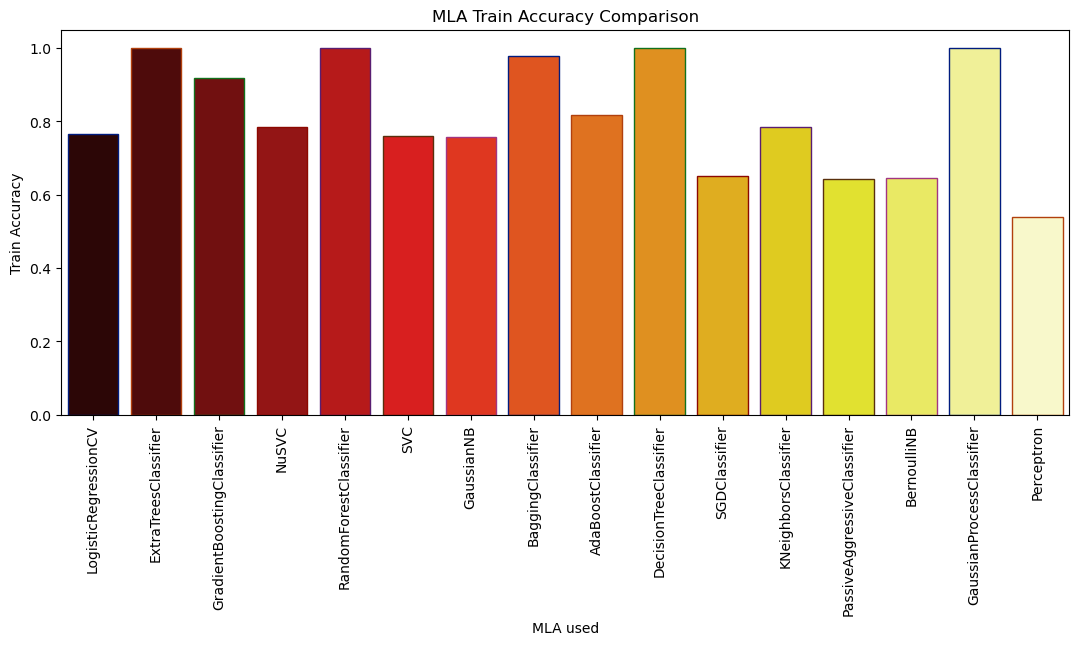

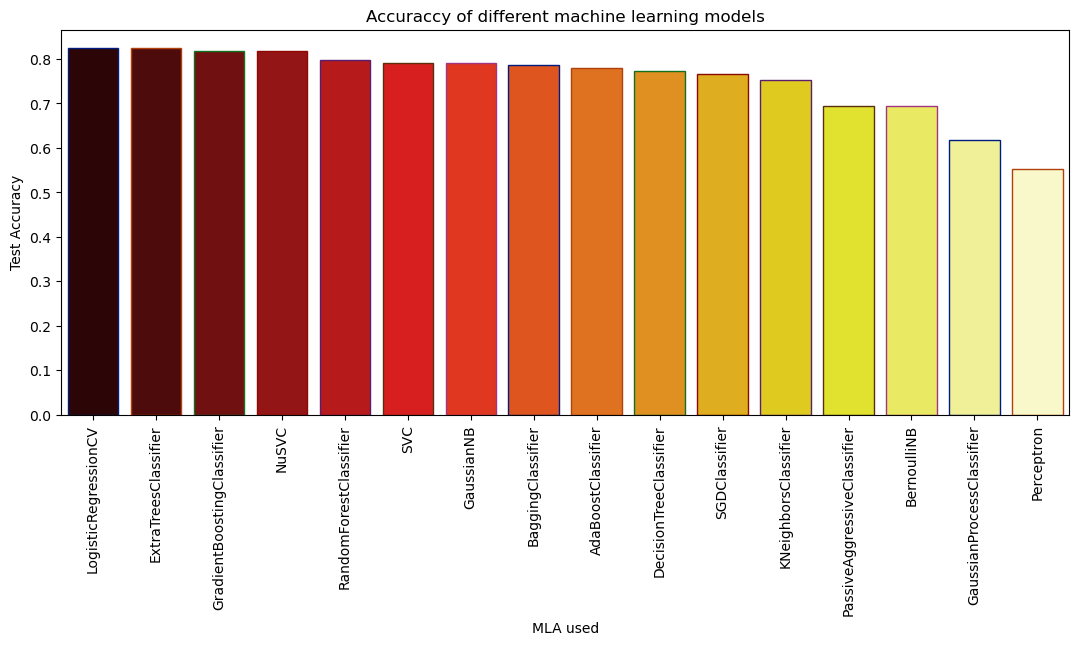

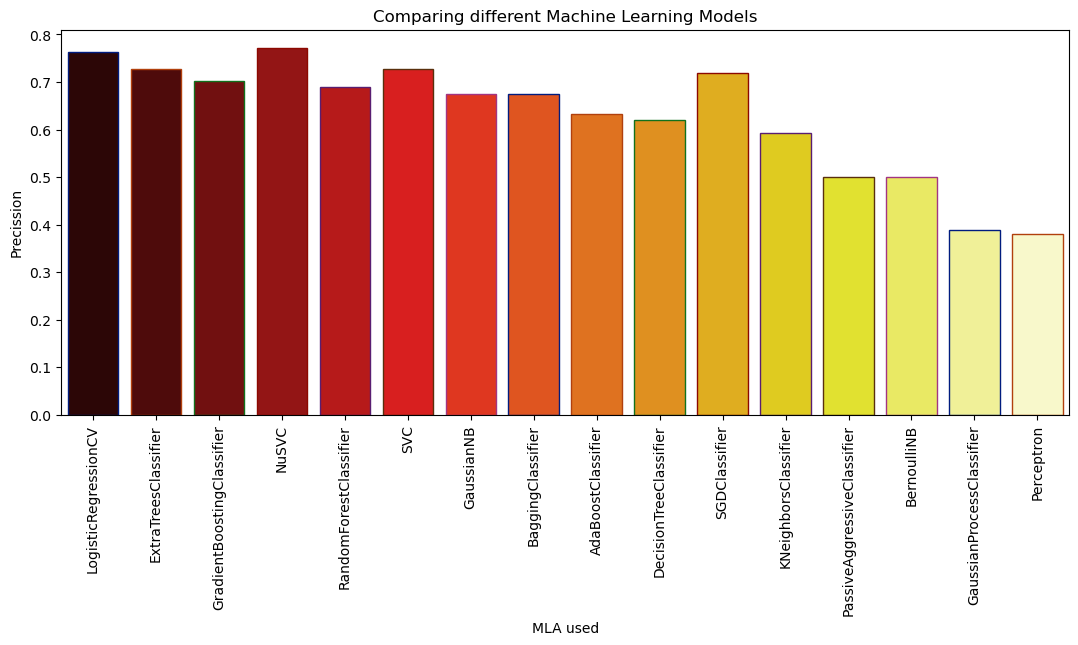

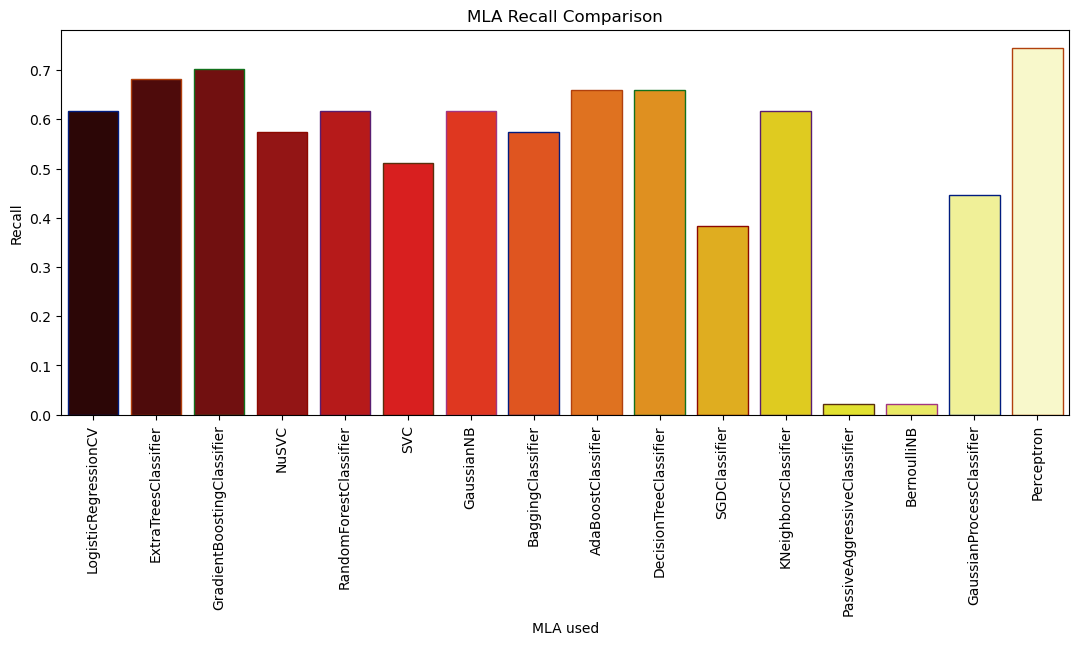

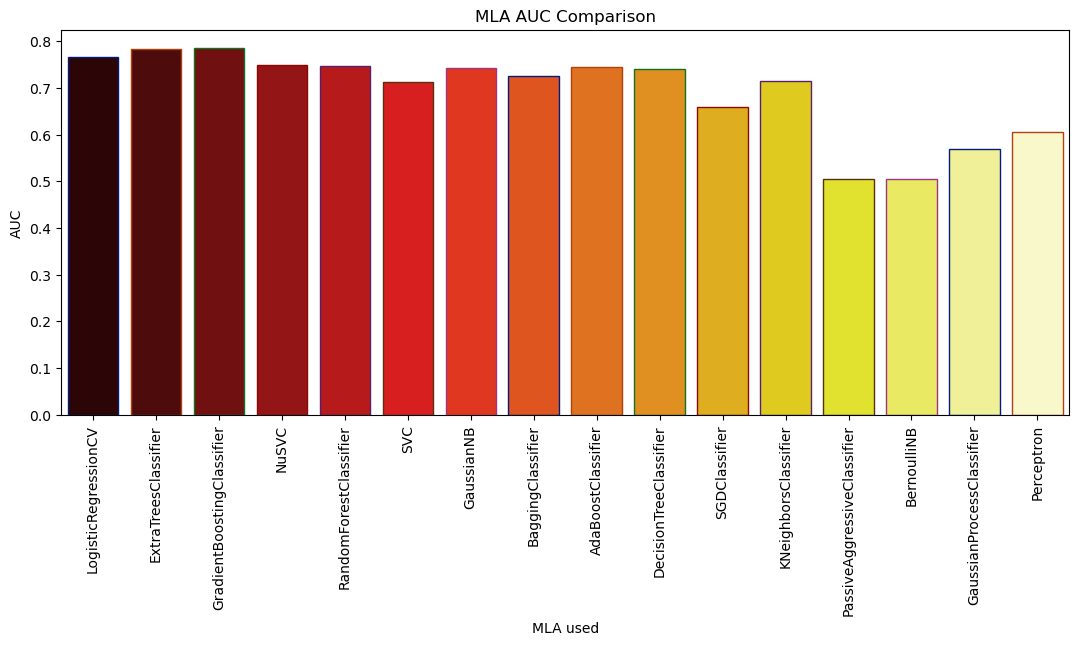

In [14]:
# In[]:
    # Creating plot to show the train accuracy
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

# In[]:
    # Creating plot to show the test accuracy
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Accuraccy of different machine learning models')
plt.show()

# In[]:
    # Creating plots to compare precision of the MLAs
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="Precission",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Comparing different Machine Learning Models')
plt.show()

# In[]:
    # Creating plots for MLA recall comparison
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="Recall",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Recall Comparison')
plt.show()

# In[]:
    # Creating plot for MLA AUC comparison
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="AUC",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA AUC Comparison')
plt.show()

C:\Users\Ictinike\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


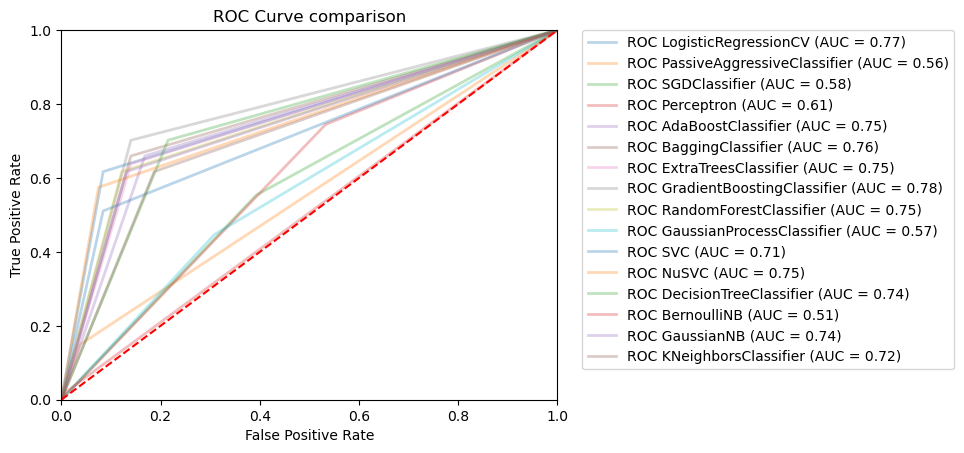

In [48]:
# In[]:
  # Creating plot to show the ROC for all MLA
# Receiver Operating Characteristic (ROC) curve is a very important tool to 
# diagnose the performance of MLAs by plotting the true positive rates against 
# the false-positive rates at different threshold levels. The area under ROC 
# curve often called AUC and it is also a good measure of the predictability of 
# the machine learning algorithms. A higher AUC is an indication of more 
# accurate prediction
index = 1
for alg in MLA:
    
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()  

In [20]:
alg=neural_network.MLPClassifier()

In [ ]:
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    MLA_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# sequential (not recursive) model (one input, one output)
model=Sequential()
model.add(Dense(512, activation="relu",
                input_shape=(2,)))
model.add(Dense(256, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(nCategories, activation="softmax"))

ModuleNotFoundError: No module named 'tensorflow'

ModuleNotFoundError: No module named 'tensorflow'

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# sequential (not recursive) model (one input, one output)
model=Sequential()
model.add(Dense(512, activation="relu",
                input_shape=(2,)))
model.add(Dense(256, activation="relu"))
model.add(Dense(64, activation="relu"))


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n = 800  # number of data points
x1 = np.random.normal(size=n)
x2 = np.random.normal(size=n)
X = np.column_stack((x1, x2))  # design matrix
alpha = np.arctan2(x2, x1)
r = np.sqrt(x1**2 + x2**2)
c1 = np.sin(3*alpha + 2*r)
c2 = np.cos(3*alpha + 2*r)
## partition the sum of a sin and cosine into 5 intervals
category = pd.cut(c1 + c2,
           bins=[-1.5, -1.1, -0.6, 0.6, 1.1, 1.5],
           labels=[1, 2, 3, 4, 5])
y = category.astype(int)

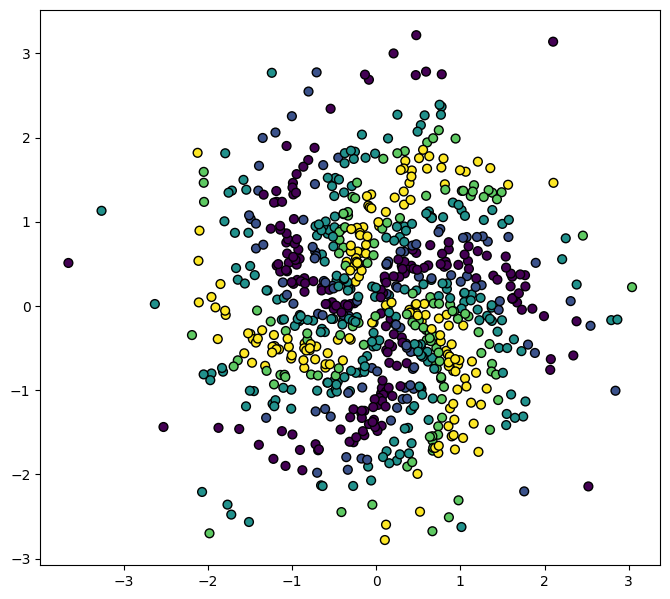

In [18]:
_ = plt.figure(figsize=(8,8))
ax = plt.axes()
_ = ax.scatter(X[:,0], X[:,1], c=y, s=40, edgecolors='black')
_ = ax.set_aspect("equal")
_ = plt.show()

In [20]:
nCategories = len(np.unique(category))

In [21]:
model.add(Dense(nCategories, activation="softmax"))

In [22]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               1536      
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 64)                16448     
                                                                 
 dense_6 (Dense)             (None, 5)                 325       
                                                                 
Total params: 149,637
Trainable params: 149,637
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
history = model.fit(X, y, epochs=200)

Epoch 1/200


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\asyncio\base_events.py", line 1899, in _run_once
      handle._run()
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Ictinike\AppData\Local\Temp\ipykernel_15000\3393657749.py", line 1, in <module>
      history = model.fit(X, y, epochs=200)
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\site-packages\keras\losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\site-packages\keras\losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\site-packages\keras\losses.py", line 1860, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\Ictinike\anaconda3\envs\tf\lib\site-packages\keras\backend.py", line 5238, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 5 which is outside the valid range of [0, 5).  Label values: 5 4 5 4 3 1 3 3 5 5 5 3 3 3 5 3 3 5 4 2 3 2 4 5 3 3 1 4 3 3 3 1
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_826]